In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df= pd.read_csv('/content/combined_data.csv')

In [ ]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [ ]:
df.shape

(1247, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1247 non-null   int64 
 1   text    1247 non-null   object
dtypes: int64(1), object(1)
memory usage: 19.6+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['label'].value_counts()

label
1    684
0    563
Name: count, dtype: int64

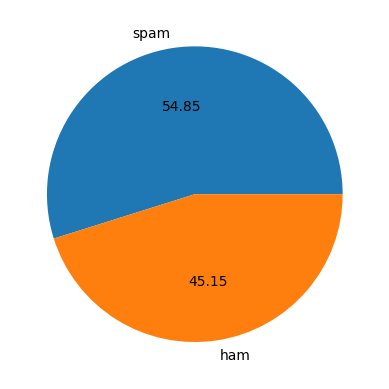

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(),labels=['spam','ham'],autopct='%0.2f')
plt.show()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters']=df['text'].apply(len)

In [ ]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,label,text,num_characters,num_words
0,1,ounce feather bowl hummingbird opec moment ala...,148,20
1,1,wulvob get your medircations online qnb ikud v...,808,104
2,0,computer connection from cnn com wednesday es...,2235,338
3,1,university degree obtain a prosperous future m...,592,76
4,0,thanks for all your answers guys i know i shou...,1362,223


In [ ]:
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,label,text,num_characters,num_words,num_sent
0,1,ounce feather bowl hummingbird opec moment ala...,148,20,1
1,1,wulvob get your medircations online qnb ikud v...,808,104,1
2,0,computer connection from cnn com wednesday es...,2235,338,1
3,1,university degree obtain a prosperous future m...,592,76,1
4,0,thanks for all your answers guys i know i shou...,1362,223,1


In [ ]:
df[['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,1247.000000,1247.000000,1247.000000
mean,1665.701684,281.933440,7.084202
std,5490.587812,1040.190419,54.487133
min,15.000000,2.000000,1.000000
25%,475.500000,85.000000,1.000000
50%,833.000000,150.000000,1.000000
75%,1806.000000,291.000000,5.000000
max,178837.000000,34899.000000,1887.000000


In [ ]:
df[df['label']==0][['num_characters','num_words','num_sent']].describe()  #ham

,num_characters,num_words,num_sent
count,563.000000,563.000000,563.000000
mean,2169.369449,377.204263,9.284192
std,7991.007417,1522.556766,80.180097
min,32.000000,5.000000,1.000000
25%,544.000000,105.000000,1.000000
50%,1059.000000,190.000000,1.000000
75%,2072.000000,350.000000,6.000000
max,178837.000000,34899.000000,1887.000000


In [ ]:
df[df['label']==1][['num_characters','num_words','num_sent']].describe()  #spam

,num_characters,num_words,num_sent
count,684.000000,684.000000,684.000000
mean,1251.133041,203.516082,5.273392
std,1439.376761,229.692961,10.903804
min,15.000000,2.000000,1.000000
25%,439.250000,73.000000,1.000000
50%,733.000000,127.000000,1.000000
75%,1501.250000,241.500000,4.000000
max,11558.000000,1652.000000,80.000000


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem import PorterStemmer
ps =PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def transform_text(text):
    text= text.lower()
    text= nltk.word_tokenize(text)

    y=[]

    for i in text:
        if i.isalnum():
            y.append(i)
    text= y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text= y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
transform_text("computer connection from cnn com wednesday es")


'comput connect cnn com wednesday es'

In [ ]:
def transform_text_1(text):
    text= nltk.word_tokenize(text)
    y=[]

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)


    return " ".join(y)

In [ ]:
transform_text_1("computer connection from cnn com wednesday es")

'computer connection cnn com wednesday es'

In [ ]:
df['transformed_text']= df['text'].apply(transform_text_1)

In [ ]:
df.head()

,label,text,num_characters,num_words,num_sent,transformed_text
0,1,ounce feather bowl hummingbird opec moment ala...,148,20,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...,808,104,1,wulvob get medircations online qnb ikud viagra...
2,0,computer connection from cnn com wednesday es...,2235,338,1,computer connection cnn com wednesday escapenu...
3,1,university degree obtain a prosperous future m...,592,76,1,university degree obtain prosperous future mon...
4,0,thanks for all your answers guys i know i shou...,1362,223,1,thanks answers guys know checked rsync manual ...


In [ ]:
ham_corpus=[]
for msg in df[df['label']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

132357

In [ ]:
from collections import Counter
Counter(ham_corpus).most_common(50)

[('escapenumber', 11020),
 ('enron', 993),
 ('http', 828),
 ('r', 737),
 ('com', 602),
 ('org', 595),
 ('``', 527),
 ('help', 503),
 ("'s", 496),
 ('c', 441),
 ('www', 419),
 ('please', 406),
 ('new', 399),
 ('would', 386),
 ('company', 376),
 ('ect', 366),
 ('energy', 365),
 ('escapelong', 359),
 ('said', 355),
 ('test', 342),
 ('list', 334),
 ('dynegy', 329),
 ('ch', 319),
 ('stat', 318),
 ('ethz', 313),
 ('html', 306),
 ('may', 303),
 ('e', 295),
 ('samba', 293),
 ('guide', 289),
 ('use', 287),
 ('trunk', 287),
 ('perl', 286),
 ('posting', 285),
 ('one', 278),
 ('power', 274),
 ("n't", 271),
 ('x', 271),
 ('pm', 258),
 ('p', 256),
 ('get', 248),
 ('code', 248),
 ('gas', 243),
 ('time', 237),
 ('also', 235),
 ('cnn', 233),
 ('like', 232),
 ('escapenumberd', 232),
 ('escapenumbere', 226),
 ('subject', 223)]

In [ ]:
spam_corpus=[]
for msg in df[df['label']==1]['transformed_text'].tolist():
  for word in msg.split():
     spam_corpus.append(word)

In [ ]:
Counter(spam_corpus).most_common(50)

[('escapenumber', 5498),
 ('escapelong', 3591),
 ('price', 426),
 ('per', 383),
 ('http', 379),
 ('com', 346),
 ('pills', 343),
 ('x', 330),
 ('company', 303),
 ('escapenumbermg', 283),
 ('retail', 271),
 ('»', 261),
 ('de', 252),
 ("'s", 246),
 ('may', 245),
 ('one', 243),
 ('e', 216),
 ('us', 213),
 ('save', 195),
 ('item', 188),
 ('please', 186),
 ('time', 186),
 ('get', 182),
 ('new', 180),
 ('money', 174),
 ('``', 173),
 ('business', 157),
 ('information', 156),
 ('adobe', 155),
 ('quality', 154),
 ('day', 147),
 ('email', 145),
 ('free', 145),
 ('see', 144),
 ('click', 142),
 ('software', 142),
 ('mail', 140),
 ('also', 137),
 ('products', 135),
 ('like', 132),
 ('office', 129),
 ('online', 128),
 ('would', 128),
 ('make', 126),
 ('need', 126),
 ('best', 126),
 ('people', 126),
 ('1', 124),
 ('product', 118),
 ('aescapenumber', 117)]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv= CountVectorizer()
tfidf= TfidfVectorizer()

In [ ]:
X= tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
y= df['label'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=45)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.872
[[104   7]
 [ 25 114]]
0.9421487603305785


In [ ]:
mnb.fit(X_train,y_train)
y_pred2= mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.952
[[106   5]
 [  7 132]]
0.9635036496350365


In [ ]:
bnb.fit(X_train,y_train)
y_pred3= bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.852
[[ 82  29]
 [  8 131]]
0.81875


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)



In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt

}

In [ ]:

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision


In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.956, 0.9324324324324325)

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.956
Precision -  0.9324324324324325
For  KN
Accuracy -  0.844
Precision -  0.9716981132075472
For  NB
Accuracy -  0.952
Precision -  0.9635036496350365
For  DT
Accuracy -  0.828
Precision -  0.7727272727272727
For  LR
Accuracy -  0.848
Precision -  0.791907514450867
For  RF
Accuracy -  0.924
Precision -  0.8947368421052632
For  AdaBoost
Accuracy -  0.912
Precision -  0.903448275862069
For  BgC
Accuracy -  0.912
Precision -  0.8874172185430463
For  ETC
Accuracy -  0.948
Precision -  0.9256756756756757
For  GBDT
Accuracy -  0.88
Precision -  0.8303030303030303


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.844,0.971698
2,NB,0.952,0.963504
0,SVC,0.956,0.932432
8,ETC,0.948,0.925676
6,AdaBoost,0.912,0.903448
5,RF,0.924,0.894737
7,BgC,0.912,0.887417
9,GBDT,0.880,0.830303
4,LR,0.848,0.791908
3,DT,0.828,0.772727


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))